# **Flight ticket price prediction**

## **dataset**

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv("/content/flight price.csv")

In [5]:
df.head()

,Date,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,price
0,01-Nov,GO FIRST,Bangalore,Delhi,06:00,08:40,02h 40m,BLR--->DEL,non-stop,"7,487"
1,01-Nov,GO FIRST,Bangalore,Delhi,21:15,23:55,02h 40m,BLR--->DEL,non-stop,"7,487"
2,01-Nov,SpiceJet,Bangalore,Delhi,02:10,04:50,02h 40m,BLR--->DEL,non-stop,"7,488"
3,01-Nov,Indigo,Bangalore,Delhi,12:55,15:40,02h 45m,BLR--->DEL,non-stop,"7,488"
4,01-Nov,Indigo,Bangalore,Delhi,14:35,17:20,02h 45m,BLR--->DEL,non-stop,"7,488"


In [55]:
df.shape

(7699, 14)

## **Pre processing**

In [7]:
df.isnull().sum().sort_values(ascending=False)

price          0
stop           0
Route          0
Durtion        0
Arr_time       0
Dep_time       0
Destination    0
Source         0
Airline        0
Date           0
dtype: int64

In [8]:
df["Dep_hour"] = pd.to_datetime(df["Dep_time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_time"]).dt.minute
df.drop(["Dep_time"], axis = 1, inplace = True)

In [9]:
df["Arr_hour"] = pd.to_datetime(df["Arr_time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arr_time"]).dt.minute
df.drop(["Arr_time"], axis = 1, inplace = True)

In [10]:
df['Durtion']=df['Durtion'].str.replace("h",':')
df['Durtion']=df['Durtion'].str.replace("m",'')
df['Durtion']=df['Durtion'].str.replace(" ",'')

In [ ]:
df["Dur_hour"]=df['Durtion'].str.split(':').str[0]
df["Dur_min"]=df['Durtion'].str.split(':').str[1]
df.drop(["Durtion"], axis = 1, inplace = True)

In [11]:
df.head()

,Date,Airline,Source,Destination,Route,stop,price,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,01-Nov,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,"7,487",6,0,8,40,02,40
1,01-Nov,GO FIRST,Bangalore,Delhi,BLR--->DEL,non-stop,"7,487",21,15,23,55,02,40
2,01-Nov,SpiceJet,Bangalore,Delhi,BLR--->DEL,non-stop,"7,488",2,10,4,50,02,40
3,01-Nov,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,"7,488",12,55,15,40,02,45
4,01-Nov,Indigo,Bangalore,Delhi,BLR--->DEL,non-stop,"7,488",14,35,17,20,02,45


In [12]:
df['price']=df['price'].str.replace(",","")

In [13]:
df['Day']=df['Date'].str.split("-").str[0]
df['Month']=df['Date'].str.split("-").str[1]

In [14]:
df.drop(["Date"], axis = 1, inplace = True)

In [15]:
column=['Airline', 'Source', 'Destination', 'Day', 'Month','Route','Dep_hour','Dep_min', 'Dur_hour','Dur_min','Arr_hour','Arr_min','stop','price']
  
# create the new index for columns
df=df.reindex(column, axis='columns')

In [16]:
df.head()

,Airline,Source,Destination,Day,Month,Route,Dep_hour,Dep_min,Dur_hour,Dur_min,Arr_hour,Arr_min,stop,price
0,GO FIRST,Bangalore,Delhi,01,Nov,BLR--->DEL,6,0,02,40,8,40,non-stop,7487
1,GO FIRST,Bangalore,Delhi,01,Nov,BLR--->DEL,21,15,02,40,23,55,non-stop,7487
2,SpiceJet,Bangalore,Delhi,01,Nov,BLR--->DEL,2,10,02,40,4,50,non-stop,7488
3,Indigo,Bangalore,Delhi,01,Nov,BLR--->DEL,12,55,02,45,15,40,non-stop,7488
4,Indigo,Bangalore,Delhi,01,Nov,BLR--->DEL,14,35,02,45,17,20,non-stop,7488


In [17]:
df["Day"] = pd.to_datetime(df.Day, format="%d").dt.day
df['Month'] =df['Month'].str.replace('Nov','11')
df["Month"] = pd.to_datetime(df["Month"], format = "%m").dt.month

In [18]:
df["Dep_hour"]=pd.to_numeric(df["Dep_hour"])
df["Dur_min"]=pd.to_numeric(df["Dur_min"])
df['price']=pd.to_numeric(df['price'])

## **EDA**

1    6209
0    1355
2     123
3      12
Name: stop, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


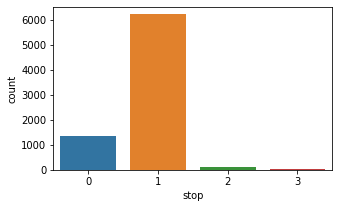

In [60]:
fig=plt.figure(figsize=(5,3))
sns.countplot(df['stop'])
print(df['stop'].value_counts())
plt.show()

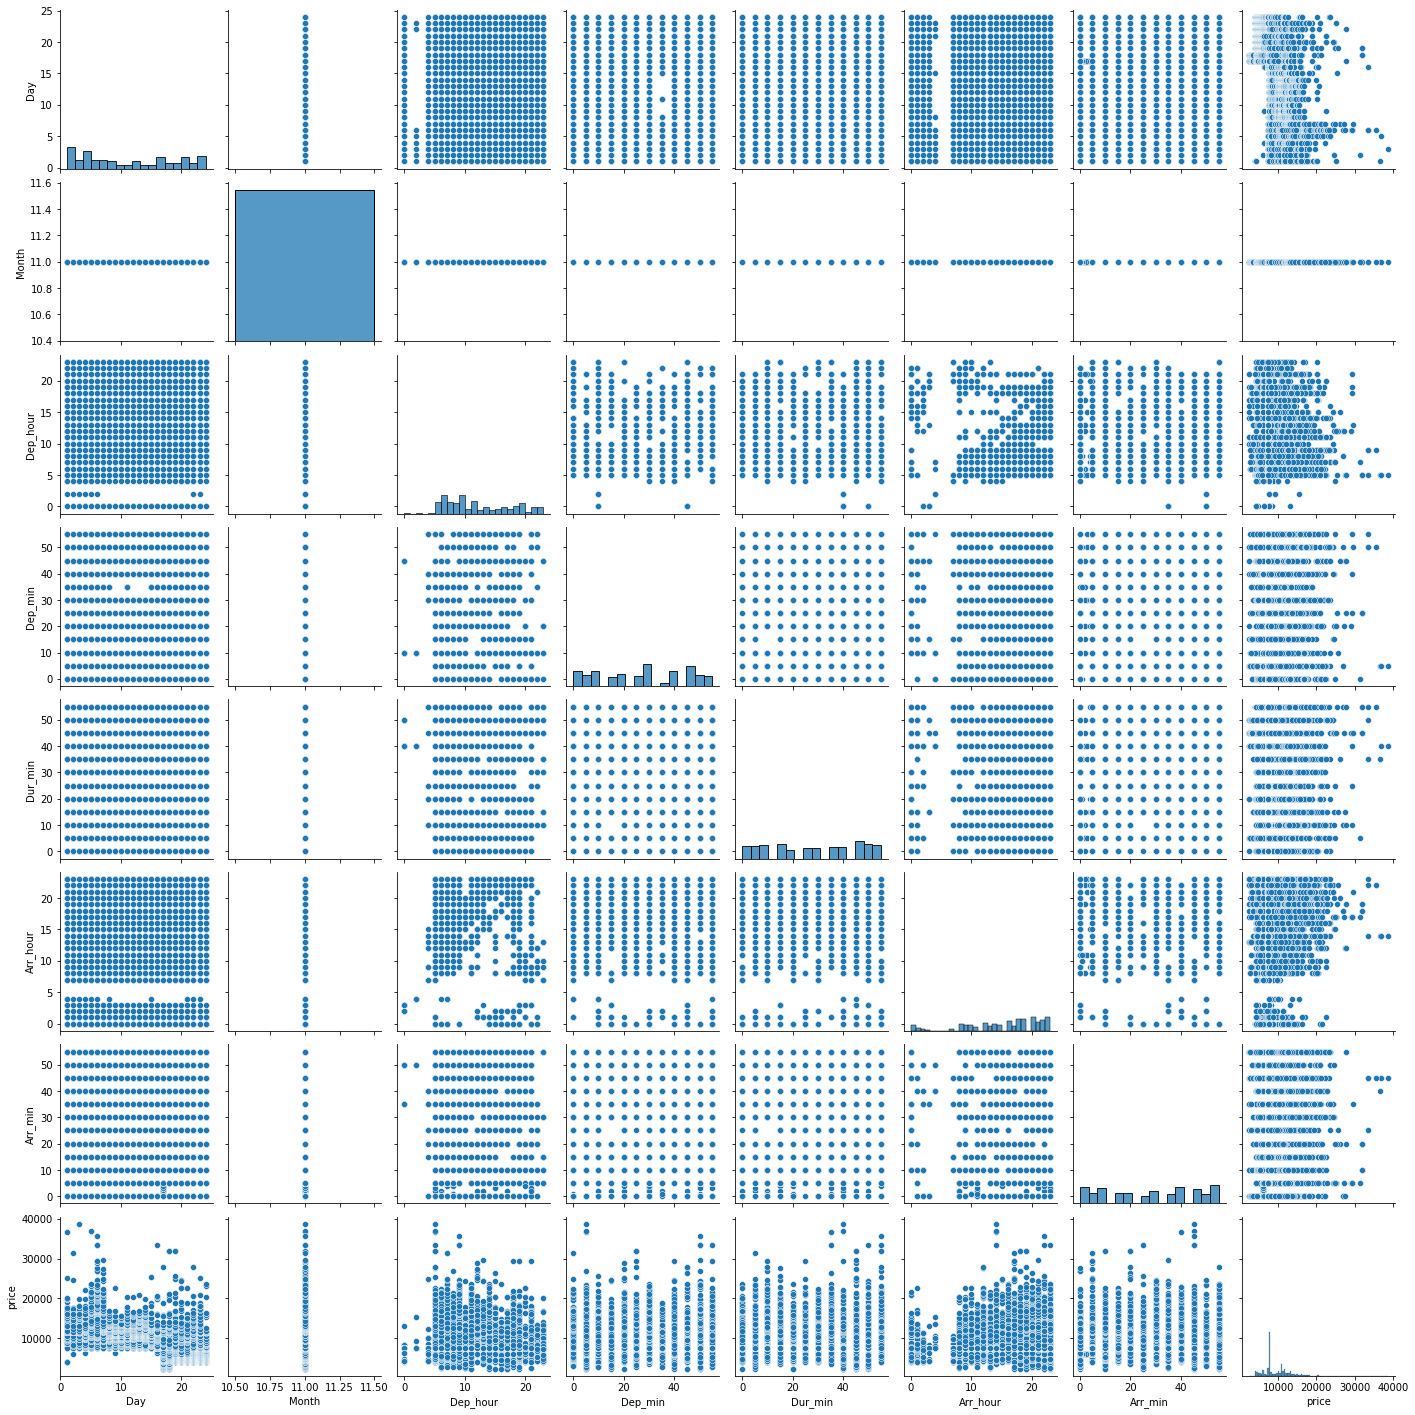

In [21]:
sns.pairplot(df)

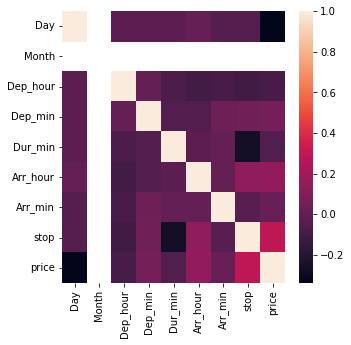

In [58]:
df_corr=df.corr()
plt.figure(figsize=[5,5])
sns.heatmap(df_corr)

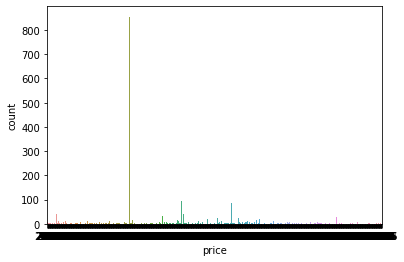

In [24]:
for i in df.columns:
  sns.countplot(x='price',data=df)

Vistara      1986
Indigo       1234
Air India    1212
GO FIRST     1014
AirAsia       843
IndiGo        602
SpiceJet      519
Go First      236
Air Asia       53
Name: Airline, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


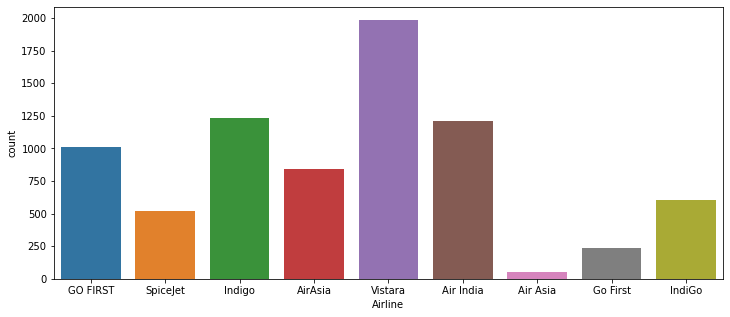

In [25]:
fig=plt.figure(figsize=(12,5))
sns.countplot(df['Airline'])
print(df['Airline'].value_counts())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


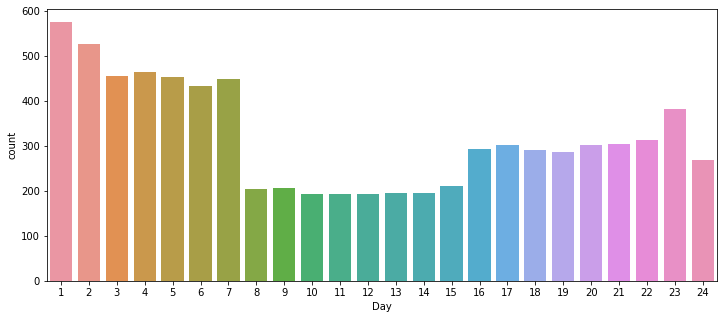

In [26]:
fig=plt.figure(figsize=(12,5))
sns.countplot(df['Day'])
plt.show()

In [27]:
print(df['Route'].unique())

['BLR--->DEL' 'BLR--->BOM-->DEL' 'BLR--->GOI-->DEL' 'BLR--->CCU-->DEL'
 'BLR--->COK-->DEL' 'BLR--->IXR-->DEL' 'BLR--->IXB-->DEL'
 'BLR--->GAU-->DEL' 'BLR--->HYD-->DEL' 'BLR--->LKO-->DEL'
 'BLR--->AMD-->DEL' 'BLR--->VNS-->DEL' 'BLR--->NAG-->DEL'
 'BLR--->BDQ-->DEL' 'BLR--->JAI-->DEL' 'BLR--->MAA-->DEL'
 'BLR--->UDR-->DEL' 'BLR--->STV-->DEL' 'BLR--->SAG-->DEL'
 'BLR--->JLR-->DEL' 'BLR--->BBI-->DEL' 'BLR--->PAT-->DEL'
 'BLR--->IXC-->DEL' 'BLR--->PNQ-->DEL' 'BLR--->VTZ-->DEL'
 'BLR--->BHO-->DEL' 'BLR--->TRV-->DEL' 'BLR-->DEL' 'DEL-->BOM' 'MAA-->DEL']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


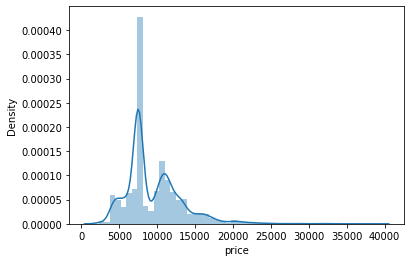

In [28]:

sns.distplot(df["price"])

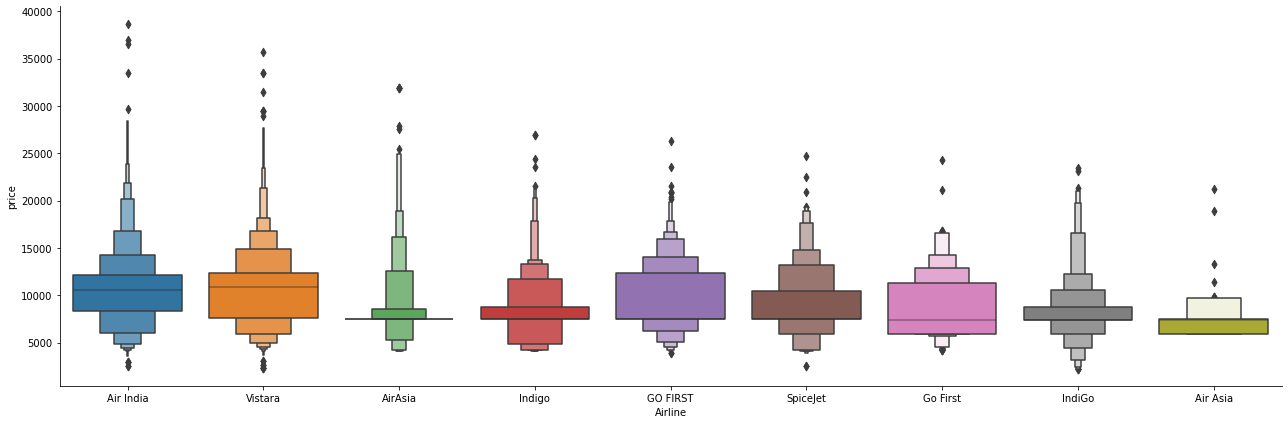

In [29]:
sns.catplot(y = "price", x = "Airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

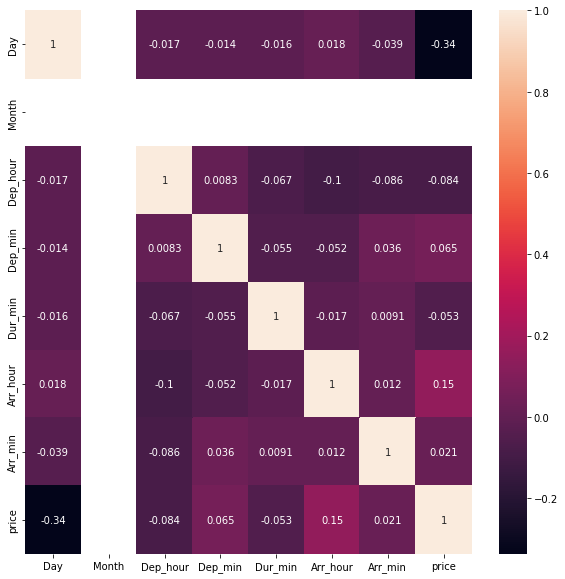

In [30]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [31]:
Airline = pd.get_dummies(df['Airline'])
Airline.head()

,Air Asia,Air India,AirAsia,GO FIRST,Go First,IndiGo,Indigo,SpiceJet,Vistara
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [32]:
df.replace({"non-stop": 0, "1-stop": 1, "2-stop": 2,"3-stop":3}, inplace = True)
df['stop']=pd.to_numeric(df['stop'])

In [33]:
df.skew()

Day         0.223779
Month       0.000000
Dep_hour    0.432399
Dep_min    -0.076733
Dur_hour    1.410779
Dur_min    -0.069376
Arr_hour   -0.879751
Arr_min    -0.072971
stop       -0.857126
price       1.485414
dtype: float64

## **Model Construction**

In [34]:
x= df.drop(columns='price')
y= df['price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,Day,Month,Dep_hour,Dep_min,Dur_min,Arr_hour,Arr_min,stop,Airline_Air Asia,Airline_Air India,Airline_AirAsia,Airline_GO FIRST,Airline_Go First,Airline_IndiGo,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Source_Bangalore,Source_Chennai,Source_New Delhi,Source_bangalore,Destination_Delhi,Destination_Mumbai,Route_BLR--->AMD-->DEL,Route_BLR--->BBI-->DEL,Route_BLR--->BDQ-->DEL,Route_BLR--->BHO-->DEL,Route_BLR--->BOM-->DEL,Route_BLR--->CCU-->DEL,Route_BLR--->COK-->DEL,Route_BLR--->DEL,Route_BLR--->GAU-->DEL,Route_BLR--->GOI-->DEL,Route_BLR--->HYD-->DEL,Route_BLR--->IXB-->DEL,Route_BLR--->IXC-->DEL,Route_BLR--->IXR-->DEL,Route_BLR--->JAI-->DEL,Route_BLR--->JLR-->DEL,Route_BLR--->LKO-->DEL,...,Route_BLR-->DEL,Route_DEL-->BOM,Route_MAA-->DEL,Dur_hour_01,Dur_hour_02,Dur_hour_03,Dur_hour_04,Dur_hour_05,Dur_hour_06,Dur_hour_07,Dur_hour_08,Dur_hour_09,Dur_hour_10,Dur_hour_11,Dur_hour_12,Dur_hour_13,Dur_hour_14,Dur_hour_15,Dur_hour_16,Dur_hour_17,Dur_hour_18,Dur_hour_19,Dur_hour_20,Dur_hour_21,Dur_hour_22,Dur_hour_23,Dur_hour_24,Dur_hour_25,Dur_hour_26,Dur_hour_27,Dur_hour_28,Dur_hour_29,Dur_hour_30,Dur_hour_31,Dur_hour_32,Dur_hour_33,Dur_hour_35,Dur_hour_37,Dur_hour_38,Dur_hour_40
0,1,11,6,0,40,8,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,11,21,15,40,23,55,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,11,2,10,40,4,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,11,12,55,45,15,40,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,11,14,35,45,17,20,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [36]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [37]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 -0.0026070466988862284
least value 0 -0.0026070466988862284
1 0.058679499864501605
2 0.06492844677506882
3 -0.008816745287911432
least value 3 -0.008816745287911432
4 0.01406891370359098
5 3024031886440996.0
6 -0.00843275739562388
7 0.028876961437174886
8 -0.0017347139977519355
9 0.014756904319203734
10 0.03639427993106803
11 0.07806584144168638
12 0.046614877599338245
13 47082943580930.05
14 2177680405863770.2
15 972739495677414.6
16 0.03682614304546994
17 0.024882290564639087
18 0.045702838859482564
19 0.033433015285433965
20 0.010517638382550043
21 0.03633346071033228
22 -0.023726587123063747
least value 22 -0.023726587123063747
23 0.019113358420048687
24 0.05794679980093331
25 -0.0002888927890950521
26 0.02942020571653825
27 68510955129674.33
28 0.029418144746866215
29 0.025832150377958052
30 0.008038048409717002
31 2357758253860526.5
32 -0.009360009437951122
33 -0.003082761994883776
34 0.03711352247642752
35 0.03701677258765257
36 -0.0017763911588581927
37 0.0013372802766148384


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=43)

### **LinearRegression**

In [41]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.36445328763863405


In [42]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  2040.2871558418192
Mean Squared Error:  8492358.11261823
Root Mean Squared Error:  2914.165079850184
Explained Variance Score:  0.39965925799977264
r2_score: 0.3996555894276962


### **RandomForestRegressor**

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9349173164570235


In [44]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1165.938003017419
Mean Squared Error:  4848836.184319328
Root Mean Squared Error:  2202.007307962289
Explained Variance Score:  0.657255353110436
r2_score: 0.6572245703214487


### **DecisionTreeRegressor**

In [45]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9719766428045244


In [46]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1339.7948051948051
Mean Squared Error:  8051541.245454545
Root Mean Squared Error:  2837.523787645585
Explained Variance Score:  0.43090411679234064
r2_score: 0.43081795196331485


## **Hyper parameter tuning**

In [48]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_features':['auto', 'sqrt', 'log2'],
             'criterion':['mse','friedman_mse','mae', 'poisson'],
             'splitter':['best', 'random']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [49]:
GCV.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  Fi

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
       

In [50]:
GCV.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}

In [51]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mae',splitter= 'best',max_features='auto')
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [52]:
print("Score of Model is",DTR.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,DTR_final))
print("Root Mean Squared Error", (mean_squared_error(y_test,DTR_final))**0.5 )

Score of Model is 0.8810088033415717
Mean Absolute Error 1331.7694805194806
Root Mean Squared Error 2886.533779421308


## **Saving the Model**

In [54]:
import joblib
joblib.dump(LR,"final model.pkl")

['final model.pkl']

analysis on the data.

1. Do airfares change frequently?
Yes, Based on Season and Demand of the flight Tickets Price changes regularly.

2. Do they move in small increments or in large jumps?
 Ans. large jumps, If you buy a ticket before few of date of journey you will get arround 44% high price  
     

3. Do they tend to go up or down over time?
Ans. Price of the flight goes up only down over time but its not reduces the price over time 

4. What is the best time to buy so that the consumer can save the most by taking the least risk?
Ans. Consumer should buy the ticket before 30 days of date of joureney so they can save up to 45% to 50%, 



4. Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? 
Ans. Yes, price of the flight will increase step by step near to departure date, like  
----> Indigo is cheaper then spice jet Airways

5. Are morning flights expensive?
Ans: No,As per the demostic flight of india all price of the flights will be same throught the day